In [ ]:
import sys, os
sys.path.append(os.pardir)

In [ ]:
%pwd

In [ ]:
import os
for dirname, _, filenames in os.walk('----'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
%cd C:\\Users\\ばやし\\Documents\\MEGAsync\\nifty

In [ ]:
%ls

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import lightgbm as lgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
import os
path = os.getcwd()
print(path)

In [ ]:
import pathlib
p = pathlib.Path('confirmlgb/datasets_89887_215882_kmnist_classmap.csv')
print(p.cwd())      # カレントディレクトリ
print(p.resolve())

In [ ]:
classes = pd.read_csv('confirmlgb/datasets_89887_215882_kmnist_classmap.csv')
print(classes.shape)
classes

(10, 3)


,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [ ]:
import os
for dirname, _, filenames in os.walk('------'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# loading training data
X_train = np.load('confirmlgb\kmnist-train-imgs.npz')['arr_0']
y_train = np.load('confirmlgb\kmnist-train-labels.npz')['arr_0']

# loading test data
X_test = np.load('confirmlgb\kmnist-test-imgs.npz')['arr_0']
y_test = np.load('confirmlgb\kmnist-test-labels.npz')['arr_0']

In [ ]:
# confirm datasize
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train[0:5])
print(classes)

[8 7 0 1 4]
   index codepoint char
0      0    U+304A    お
1      1    U+304D    き
2      2    U+3059    す
3      3    U+3064    つ
4      4    U+306A    な
5      5    U+306F    は
6      6    U+307E    ま
7      7    U+3084    や
8      8    U+308C    れ
9      9    U+3092    を


In [ ]:
labelindex = classes.set_index('index').to_dict()['char']
labelindex

{0: 'お',
 1: 'き',
 2: 'す',
 3: 'つ',
 4: 'な',
 5: 'は',
 6: 'ま',
 7: 'や',
 8: 'れ',
 9: 'を'}

In [ ]:
print(X_train.min(), '-', X_train.max())

0 - 255


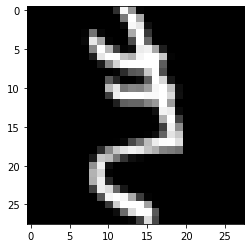

In [ ]:
plt.imshow(X_train[423], cmap = plt.cm.gray)

In [ ]:
print(y_train[423], labelindex[1])

1 き


In [ ]:
X_train[0, 10:15, 10:15]

array([[  0,   0, 133,  91,   7],
       [  0,   0, 128, 128,  20],
       [  0,   0,  95, 224,  20],
       [  0,   0, 112, 159,  64],
       [  0,   1, 211, 234, 253]], dtype=uint8)

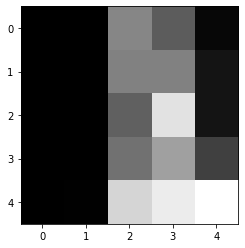

In [ ]:
plt.imshow(X_train[0, 10:15, 10:15], cmap=plt.cm.gray)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [ ]:
lgb.LGBMClassifier()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
eval_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [ ]:
params = {
    'task':'train',
    'boosting_type':'gbdt',
    'objective':'multiclass',
    'num_class':10,
    'verbose':2,
}

In [ ]:
gbm = lgb.train(
    params,
    train_data,
    valid_sets = eval_data,
    num_boost_round=100,
    verbose_eval=5,
)

[5]	valid_0's multi_logloss: 1.71401
[10]	valid_0's multi_logloss: 1.43197
[15]	valid_0's multi_logloss: 1.2474
[20]	valid_0's multi_logloss: 1.11132
[25]	valid_0's multi_logloss: 1.00722
[30]	valid_0's multi_logloss: 0.924201
[35]	valid_0's multi_logloss: 0.856528
[40]	valid_0's multi_logloss: 0.799088
[45]	valid_0's multi_logloss: 0.751136
[50]	valid_0's multi_logloss: 0.711042
[55]	valid_0's multi_logloss: 0.675216
[60]	valid_0's multi_logloss: 0.645093
[65]	valid_0's multi_logloss: 0.617719
[70]	valid_0's multi_logloss: 0.594623
[75]	valid_0's multi_logloss: 0.573648
[80]	valid_0's multi_logloss: 0.5548
[85]	valid_0's multi_logloss: 0.537461
[90]	valid_0's multi_logloss: 0.52171
[95]	valid_0's multi_logloss: 0.508122
[100]	valid_0's multi_logloss: 0.49569


In [ ]:
preds = gbm.predict(X_test)
y_pred = []
for x in preds:
    y_pred.append(np.argmax(x))
confusion_matrix(y_test, y_pred)

array([[872,   3,   2,   4,  31,  16,   3,  34,  31,   4],
       [  2, 840,  34,   4,  24,   5,  49,   6,  15,  21],
       [  6,  22, 826,  48,  17,   7,  27,  14,  21,  12],
       [  2,  13,  31, 917,   8,   4,   6,   7,   3,   9],
       [ 35,  22,  24,  13, 834,   8,  23,   9,  18,  14],
       [  7,  25, 101,   7,  16, 802,  26,   2,  12,   2],
       [  2,  18,  52,   4,  19,   5, 885,   9,   3,   3],
       [  9,  21,  12,   5,  73,   2,  34, 787,  37,  20],
       [  5,  34,  10,  32,   2,   7,  21,   1, 883,   5],
       [  5,  21,  30,   7,  34,   3,  12,  26,  25, 837]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

0.8483

In [ ]:
from sklearn.metrics import classification_report
import pprint
pprint.pprint(classification_report(y_test, y_pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.92      0.87      0.90      1000\n'
 '           1       0.82      0.84      0.83      1000\n'
 '           2       0.74      0.83      0.78      1000\n'
 '           3       0.88      0.92      0.90      1000\n'
 '           4       0.79      0.83      0.81      1000\n'
 '           5       0.93      0.80      0.86      1000\n'
 '           6       0.81      0.89      0.85      1000\n'
 '           7       0.88      0.79      0.83      1000\n'
 '           8       0.84      0.88      0.86      1000\n'
 '           9       0.90      0.84      0.87      1000\n'
 '\n'
 '    accuracy                           0.85     10000\n'
 '   macro avg       0.85      0.85      0.85     10000\n'
 'weighted avg       0.85      0.85      0.85     10000\n')


In [ ]:
import xgboost as xgb

In [ ]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_target = pd.Series(iris.target)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size = 0.2, shuffle=True)

In [ ]:
dtrain = xgb.DMatrix(train_x, label=train_y)

In [ ]:
param = {
    'max_depth':2,
    'eta':1,
    'objective':'multi:softmax',
    'num_class':3
}

In [ ]:
num_round = 10
bst = xgb.train(param, dtrain, num_round)

In [ ]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

score:0.9000


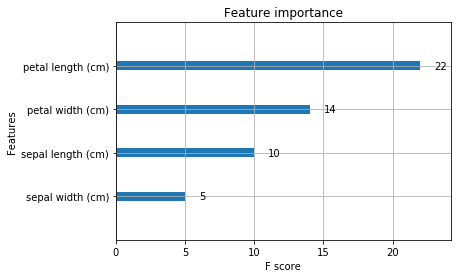

In [ ]:
xgb.plot_importance(bst)

In [ ]:
# validation data
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size = 0.2, shuffle=True)

In [ ]:
dtrain = xgb.DMatrix(train_x, label = train_y)
dvalid = xgb.DMatrix(valid_x, label = valid_y)

In [ ]:
param = {
    'max_depth':2,
    'eta':0.5,
    'objective':'multi:softmax',
    'num_class':3,
    'eval_metric':'mlogloss'
}

In [ ]:
evallist = [(dvalid, 'eval'), (dtrain, 'train')]
num_round = 10000
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds = 5)

[0]	eval-mlogloss:0.581298	train-mlogloss:0.569124
Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.

Will train until train-mlogloss hasn't improved in 5 rounds.
[1]	eval-mlogloss:0.359793	train-mlogloss:0.349287
[2]	eval-mlogloss:0.230961	train-mlogloss:0.23338
[3]	eval-mlogloss:0.155827	train-mlogloss:0.162387
[4]	eval-mlogloss:0.118333	train-mlogloss:0.12206
[5]	eval-mlogloss:0.087906	train-mlogloss:0.094474
[6]	eval-mlogloss:0.063091	train-mlogloss:0.07661
[7]	eval-mlogloss:0.05355	train-mlogloss:0.063228
[8]	eval-mlogloss:0.048077	train-mlogloss:0.053667
[9]	eval-mlogloss:0.043627	train-mlogloss:0.047337
[10]	eval-mlogloss:0.041952	train-mlogloss:0.043372
[11]	eval-mlogloss:0.039058	train-mlogloss:0.041295
[12]	eval-mlogloss:0.037492	train-mlogloss:0.039357
[13]	eval-mlogloss:0.03786	train-mlogloss:0.037616
[14]	eval-mlogloss:0.039217	train-mlogloss:0.036393
[15]	eval-mlogloss:0.040841	train-mlogloss:0.035384
[16]	eval-mlogloss:0.037192	tra

[155]	eval-mlogloss:0.014963	train-mlogloss:0.020379
[156]	eval-mlogloss:0.014967	train-mlogloss:0.020372
[157]	eval-mlogloss:0.014917	train-mlogloss:0.020366
[158]	eval-mlogloss:0.014925	train-mlogloss:0.020359
[159]	eval-mlogloss:0.014925	train-mlogloss:0.020353
[160]	eval-mlogloss:0.01494	train-mlogloss:0.020341
[161]	eval-mlogloss:0.014933	train-mlogloss:0.020329
[162]	eval-mlogloss:0.014902	train-mlogloss:0.020321
[163]	eval-mlogloss:0.014885	train-mlogloss:0.020315
[164]	eval-mlogloss:0.014898	train-mlogloss:0.020309
[165]	eval-mlogloss:0.014895	train-mlogloss:0.020302
[166]	eval-mlogloss:0.014857	train-mlogloss:0.020297
[167]	eval-mlogloss:0.01487	train-mlogloss:0.020291
[168]	eval-mlogloss:0.014868	train-mlogloss:0.020284
[169]	eval-mlogloss:0.014857	train-mlogloss:0.020279
[170]	eval-mlogloss:0.014864	train-mlogloss:0.020272
[171]	eval-mlogloss:0.014863	train-mlogloss:0.020267
[172]	eval-mlogloss:0.014874	train-mlogloss:0.020261
[173]	eval-mlogloss:0.014827	train-mlogloss:0.02

[311]	eval-mlogloss:0.014129	train-mlogloss:0.019541
[312]	eval-mlogloss:0.014122	train-mlogloss:0.019535
[313]	eval-mlogloss:0.014116	train-mlogloss:0.019529
[314]	eval-mlogloss:0.014109	train-mlogloss:0.019523
[315]	eval-mlogloss:0.014103	train-mlogloss:0.019517
[316]	eval-mlogloss:0.014086	train-mlogloss:0.019511
[317]	eval-mlogloss:0.014065	train-mlogloss:0.019507
[318]	eval-mlogloss:0.014058	train-mlogloss:0.019504
[319]	eval-mlogloss:0.014061	train-mlogloss:0.019501
[320]	eval-mlogloss:0.014045	train-mlogloss:0.019499
[321]	eval-mlogloss:0.01405	train-mlogloss:0.019496
[322]	eval-mlogloss:0.014052	train-mlogloss:0.019493
[323]	eval-mlogloss:0.014045	train-mlogloss:0.019491
[324]	eval-mlogloss:0.014049	train-mlogloss:0.019489
[325]	eval-mlogloss:0.014052	train-mlogloss:0.019486
[326]	eval-mlogloss:0.014028	train-mlogloss:0.019484
[327]	eval-mlogloss:0.014033	train-mlogloss:0.019481
[328]	eval-mlogloss:0.014019	train-mlogloss:0.019479
[329]	eval-mlogloss:0.014024	train-mlogloss:0.0

[467]	eval-mlogloss:0.013654	train-mlogloss:0.019095
[468]	eval-mlogloss:0.013637	train-mlogloss:0.019093
[469]	eval-mlogloss:0.013626	train-mlogloss:0.019092
[470]	eval-mlogloss:0.013628	train-mlogloss:0.01909
[471]	eval-mlogloss:0.013629	train-mlogloss:0.019089
[472]	eval-mlogloss:0.013626	train-mlogloss:0.019088
[473]	eval-mlogloss:0.013628	train-mlogloss:0.019086
[474]	eval-mlogloss:0.013628	train-mlogloss:0.019085
[475]	eval-mlogloss:0.013618	train-mlogloss:0.019083
[476]	eval-mlogloss:0.01362	train-mlogloss:0.019082
[477]	eval-mlogloss:0.013621	train-mlogloss:0.019081
[478]	eval-mlogloss:0.013607	train-mlogloss:0.01908
[479]	eval-mlogloss:0.01361	train-mlogloss:0.019078
[480]	eval-mlogloss:0.013611	train-mlogloss:0.019077
[481]	eval-mlogloss:0.013614	train-mlogloss:0.019076
[482]	eval-mlogloss:0.013625	train-mlogloss:0.019073
[483]	eval-mlogloss:0.013623	train-mlogloss:0.01907
[484]	eval-mlogloss:0.013629	train-mlogloss:0.019068
[485]	eval-mlogloss:0.013625	train-mlogloss:0.01906

[623]	eval-mlogloss:0.013402	train-mlogloss:0.018859
[624]	eval-mlogloss:0.013394	train-mlogloss:0.018859
[625]	eval-mlogloss:0.013394	train-mlogloss:0.018858
[626]	eval-mlogloss:0.013395	train-mlogloss:0.018857
[627]	eval-mlogloss:0.013395	train-mlogloss:0.018856
[628]	eval-mlogloss:0.013394	train-mlogloss:0.018855
[629]	eval-mlogloss:0.013394	train-mlogloss:0.018854
[630]	eval-mlogloss:0.013394	train-mlogloss:0.018853
[631]	eval-mlogloss:0.013398	train-mlogloss:0.018852
[632]	eval-mlogloss:0.013406	train-mlogloss:0.018851
[633]	eval-mlogloss:0.013404	train-mlogloss:0.01885
[634]	eval-mlogloss:0.013401	train-mlogloss:0.018849
[635]	eval-mlogloss:0.013399	train-mlogloss:0.018847
[636]	eval-mlogloss:0.013396	train-mlogloss:0.018846
[637]	eval-mlogloss:0.013394	train-mlogloss:0.018845
[638]	eval-mlogloss:0.013392	train-mlogloss:0.018844
[639]	eval-mlogloss:0.01339	train-mlogloss:0.018843
[640]	eval-mlogloss:0.013388	train-mlogloss:0.018842
[641]	eval-mlogloss:0.013394	train-mlogloss:0.01

[779]	eval-mlogloss:0.013271	train-mlogloss:0.018723
[780]	eval-mlogloss:0.013276	train-mlogloss:0.018722
[781]	eval-mlogloss:0.013269	train-mlogloss:0.018722
[782]	eval-mlogloss:0.013274	train-mlogloss:0.018721
[783]	eval-mlogloss:0.013267	train-mlogloss:0.01872
[784]	eval-mlogloss:0.013272	train-mlogloss:0.01872
[785]	eval-mlogloss:0.013281	train-mlogloss:0.018719
[786]	eval-mlogloss:0.013274	train-mlogloss:0.018718
[787]	eval-mlogloss:0.013279	train-mlogloss:0.018718
[788]	eval-mlogloss:0.013272	train-mlogloss:0.018717
[789]	eval-mlogloss:0.013277	train-mlogloss:0.018716
[790]	eval-mlogloss:0.01327	train-mlogloss:0.018716
[791]	eval-mlogloss:0.013276	train-mlogloss:0.018715
[792]	eval-mlogloss:0.013269	train-mlogloss:0.018714
[793]	eval-mlogloss:0.013274	train-mlogloss:0.018714
[794]	eval-mlogloss:0.013266	train-mlogloss:0.018713
[795]	eval-mlogloss:0.013271	train-mlogloss:0.018712
[796]	eval-mlogloss:0.013264	train-mlogloss:0.018712
[797]	eval-mlogloss:0.013269	train-mlogloss:0.018

[935]	eval-mlogloss:0.013196	train-mlogloss:0.018639
[936]	eval-mlogloss:0.0132	train-mlogloss:0.018639
[937]	eval-mlogloss:0.013197	train-mlogloss:0.018639
[938]	eval-mlogloss:0.013195	train-mlogloss:0.018638
[939]	eval-mlogloss:0.013194	train-mlogloss:0.018638
[940]	eval-mlogloss:0.013198	train-mlogloss:0.018637
[941]	eval-mlogloss:0.013195	train-mlogloss:0.018637
[942]	eval-mlogloss:0.013194	train-mlogloss:0.018637
[943]	eval-mlogloss:0.013192	train-mlogloss:0.018636
[944]	eval-mlogloss:0.01319	train-mlogloss:0.018636
[945]	eval-mlogloss:0.013188	train-mlogloss:0.018636
[946]	eval-mlogloss:0.013192	train-mlogloss:0.018635
[947]	eval-mlogloss:0.01319	train-mlogloss:0.018635
[948]	eval-mlogloss:0.013194	train-mlogloss:0.018634
[949]	eval-mlogloss:0.013191	train-mlogloss:0.018634
[950]	eval-mlogloss:0.013189	train-mlogloss:0.018634
[951]	eval-mlogloss:0.013187	train-mlogloss:0.018633
[952]	eval-mlogloss:0.013187	train-mlogloss:0.018633
[953]	eval-mlogloss:0.013185	train-mlogloss:0.0186

[1089]	eval-mlogloss:0.013142	train-mlogloss:0.018595
[1090]	eval-mlogloss:0.013141	train-mlogloss:0.018594
[1091]	eval-mlogloss:0.013144	train-mlogloss:0.018594
[1092]	eval-mlogloss:0.013142	train-mlogloss:0.018594
[1093]	eval-mlogloss:0.013141	train-mlogloss:0.018594
[1094]	eval-mlogloss:0.01314	train-mlogloss:0.018594
[1095]	eval-mlogloss:0.013143	train-mlogloss:0.018593
[1096]	eval-mlogloss:0.013141	train-mlogloss:0.018593
[1097]	eval-mlogloss:0.01314	train-mlogloss:0.018593
[1098]	eval-mlogloss:0.013139	train-mlogloss:0.018593
[1099]	eval-mlogloss:0.013138	train-mlogloss:0.018593
[1100]	eval-mlogloss:0.013137	train-mlogloss:0.018592
[1101]	eval-mlogloss:0.013136	train-mlogloss:0.018592
[1102]	eval-mlogloss:0.013138	train-mlogloss:0.018592
[1103]	eval-mlogloss:0.013137	train-mlogloss:0.018592
[1104]	eval-mlogloss:0.013135	train-mlogloss:0.018591
[1105]	eval-mlogloss:0.013139	train-mlogloss:0.018591
[1106]	eval-mlogloss:0.013137	train-mlogloss:0.018591
[1107]	eval-mlogloss:0.013136	

In [ ]:
print('Best Score:{0:.4f}, Iteration:{1:d}, Ntree_Limit:{2:d}'.format(
    bst.best_score, bst.best_iteration, bst.best_ntree_limit))

Best Score:0.0186, Iteration:1129, Ntree_Limit:1130


In [ ]:
dtest = xgb.DMatrix(test_x,label = test_y)
pred = ypred = bst.predict(dtest, ntree_limit = bst.best_ntree_limit)

In [ ]:
from sklearn.metrics import accuracy_score
# accuracy_score(dtest, ypred)
import numpy as np
print('score:{0:.4f}'.format(accuracy_score(test_y,pred)))

score:0.9000
